In [1]:
import pandas as pd
from pandas import Series,DataFrame
import numpy as np

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
from sklearn.datasets import load_boston

In [9]:
boston = load_boston()

In [10]:
print(boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [16]:
boston_df = pd.DataFrame(boston.data)
boston_df.columns = boston.feature_names
boston_df['Price'] = boston.target

In [17]:
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


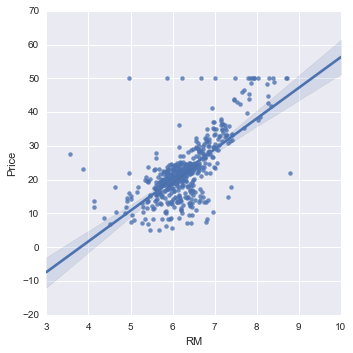

In [28]:
sns.lmplot('RM','Price',data=boston_df)

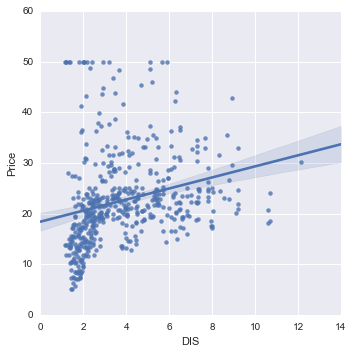

In [22]:
sns.lmplot('DIS','Price',data=boston_df)

In [29]:
import sklearn
from sklearn.linear_model import LinearRegression

In [30]:
lreg = LinearRegression()

In [52]:
X_multi = boston_df.drop('Price',1)

Y_multi = boston_df.Price

In [53]:
X_multi.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18,2.31,0,0.538,10.6650,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0,7.07,0,0.469,11.3881,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0,7.07,0,0.469,12.1521,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0,2.18,0,0.458,13.0602,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0,2.18,0,0.458,13.2092,54.2,6.0622,3,222,18.7,396.90,5.33


In [54]:
lreg.fit(X_multi,Y_multi)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [61]:
coeff_df = DataFrame(boston_df.columns)
coeff_df.columns = ['Features']

coeff_df["Coefficient Estimate"] = pd.Series(lreg.coef_)

In [62]:
coeff_df

,Features,Coefficient Estimate
0,CRIM,-0.107171
1,ZN,0.046395
2,INDUS,0.020860
3,CHAS,2.688561
4,NOX,-17.795759
5,RM,3.804752
6,AGE,0.000751
7,DIS,-5.280511
8,RAD,0.305655
9,TAX,-0.012329


In [94]:
X = [boston_df.RM,boston_df.DIS]

X[:10]

[0      10.6650
 1      11.3881
 2      12.1521
 3      13.0602
 4      13.2092
 5      12.4922
 6      11.5725
 7      12.1225
 8      11.7131
 9      12.5961
 10     12.7237
 11     12.2357
 12     11.3399
 13     10.6565
 14     10.5579
 15     10.3326
 16     10.4336
 17     10.2479
 18      9.2525
 19      9.5235
 20      9.3679
 21      9.9773
 22     10.1189
 23      9.9082
 24     10.3236
 25     10.0536
 26     10.4950
 27     10.5004
 28     10.9497
 29     10.9130
         ...   
 476     8.7893
 477     7.4047
 478     8.3555
 479     8.1802
 480     9.6662
 481    10.0817
 482    10.4716
 483     9.8603
 484     9.5950
 485    10.3037
 486     9.6599
 487     9.0573
 488     7.2749
 489     7.1694
 490     6.9156
 491     7.8511
 492     8.0929
 493     8.0887
 494     8.3077
 495     8.4686
 496     8.1886
 497     8.6867
 498     8.4281
 499     7.9689
 500     8.5252
 501     9.0716
 502     8.4075
 503     9.1435
 504     9.1829
 505     8.5350
 Name: RM, dtype: float6

In [106]:
X1 = np.array(boston_df.RM)
X2 = np.array(Series(boston_df.DIS))
X = np.vstack(X1)

In [107]:
X = np.array( [ [value,1] for value in X ] )

In [108]:
X

array([[array([ 10.665]), 1],
       [array([ 11.3881]), 1],
       [array([ 12.1521]), 1],
       ..., 
       [array([ 9.1435]), 1],
       [array([ 9.1829]), 1],
       [array([ 8.535]), 1]], dtype=object)

In [112]:
X_train, X_test, Y_train, Y_test = sklearn.cross_validation.train_test_split(X_multi,boston_df.Price)

In [113]:
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(379, 13) (127, 13) (379,) (127,)


In [114]:
X_test[:10]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
353,0.01709,90.0,2.02,0,0.410,18.8545,36.1,12.1265,5,187,17.0,384.46,4.50
7,0.14455,12.5,7.87,0,0.524,12.1225,96.1,5.9505,5,311,15.2,396.90,19.15
93,0.02875,28.0,15.04,0,0.464,9.8769,28.9,3.6659,4,270,18.2,396.33,6.21
450,6.71772,0.0,18.10,0,0.713,9.0726,92.6,2.3236,24,666,20.2,0.32,17.44
120,0.06899,0.0,25.65,0,0.581,8.1277,69.7,2.2577,2,188,19.1,389.15,14.37
27,0.95577,0.0,8.14,0,0.538,10.5004,88.8,4.4534,4,307,21.0,306.38,17.28
135,0.55778,0.0,21.89,0,0.624,8.4457,98.2,2.1107,4,437,21.2,394.67,16.96
114,0.14231,0.0,10.01,0,0.547,8.5105,84.2,2.2565,6,432,17.8,388.74,10.45
242,0.10290,30.0,4.93,0,0.428,13.3935,52.9,7.0355,6,300,16.6,372.75,11.22
55,0.01311,90.0,1.22,0,0.403,15.9456,21.9,8.6966,5,226,17.9,395.93,4.81


In [115]:
lreg.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [116]:
len(lreg.coef_)

13

In [117]:
pred_train = lreg.predict(X_train)
pred_test = lreg.predict(X_test)

In [118]:
print("Fit a model X_train, and calculate MSE with Y_train: "  ,np.mean((Y_train - pred_train) ** 2))
    
print("Fit a model X_train, and calculate MSE with X_test and Y_test: " ,np.mean((Y_test - pred_test) ** 2))

Fit a model X_train, and calculate MSE with Y_train:  19.5266818951
Fit a model X_train, and calculate MSE with X_test and Y_test:  31.4452487906


In [119]:
lreg.score(X_test,Y_test)

0.68960646421920291